In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
zomatodata = pandas.read_csv("Zomato data .csv")

In [3]:
zomatodata

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
def handling(value):
    value = str(value)
    value=value.split('/')
    value=value[0]
    return float(value)

zomatodata["rate"] = zomatodata["rate"].apply(handling)

# zomatodata.loc[:,"rate"] = zomatodata.loc[:,"rate"].apply(handling)

In [5]:
zomatodata

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [6]:
zomatodata.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [7]:
zomatodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Types of Restaurants majority customers order from : 

In [8]:
group_rest = zomatodata.groupby("listed_in(type)")

In [9]:
print("Types Of Restaurants: ")
for rest_name , rest_type in group_rest:
    print(rest_name)

Types Of Restaurants: 
Buffet
Cafes
Dining
other


In [10]:
for rest_name , rest_type in group_rest:
    print(rest_name)
    print(rest_type)

Buffet
                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   

   rate  votes  approx_cost(for two people) listed_in(type)  
0   4.1    775                          800          Buffet  
1   4.1    787                          800          Buffet  
2   3.8    918                          800          Buffet  
3   3.7     88                          300          Buffet  
4   3.8    166                          600          Buffe

In [11]:
group_rest['listed_in(type)'].count()

listed_in(type)
Buffet      7
Cafes      23
Dining    110
other       8
Name: listed_in(type), dtype: int64

In [12]:
# finding indiviual restaurant and their count
# like for cafes :
group_rest.get_group('Cafes')['listed_in(type)'].count()

23

Text(0.5, 0, 'Types of restaurants')

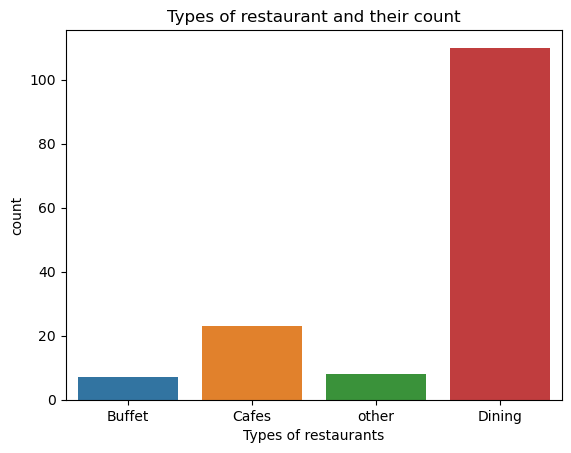

In [13]:
seaborn.countplot(x=zomatodata["listed_in(type)"])
plt.title("Types of restaurant and their count")
plt.xlabel("Types of restaurants")

# How Many Votes has each type of Restaurant received from customers? :

In [14]:
for rest_name , rest_type in group_rest:
    print(rest_name)

Buffet
Cafes
Dining
other


In [15]:
for rest_name , rest_type in group_rest:
    print(rest_name)
    print(rest_type)

Buffet
                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   

   rate  votes  approx_cost(for two people) listed_in(type)  
0   4.1    775                          800          Buffet  
1   4.1    787                          800          Buffet  
2   3.8    918                          800          Buffet  
3   3.7     88                          300          Buffet  
4   3.8    166                          600          Buffe

In [16]:
print("Types of Restaurants and their votes recieved from customers : ")
group_rest["votes"].sum()

Types of Restaurants and their votes recieved from customers : 


listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [17]:
grouping_datas = zomatodata.groupby("listed_in(type)")["votes"].sum()

In [18]:
grouping_datas

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [19]:
result = pandas.DataFrame({'votes' : grouping_datas})

In [20]:
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0.5, 1.0, 'Restaurants and their corresponding Votes Given by Customers')

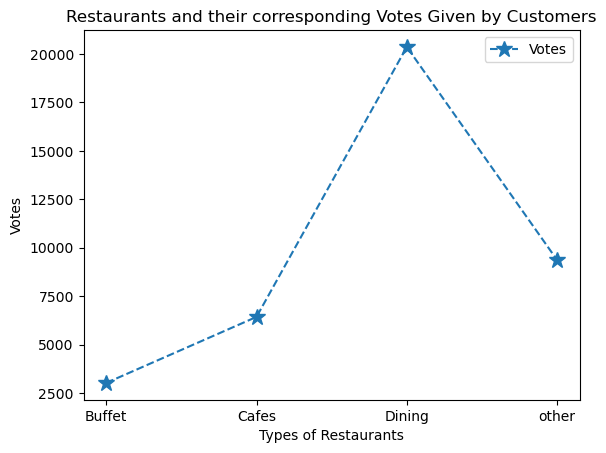

In [21]:
plt.plot(result,label="Votes" , linestyle="--" , marker = "*",markersize=12)
plt.legend()
plt.xlabel("Types of Restaurants")
plt.ylabel("Votes")
plt.title("Restaurants and their corresponding Votes Given by Customers")

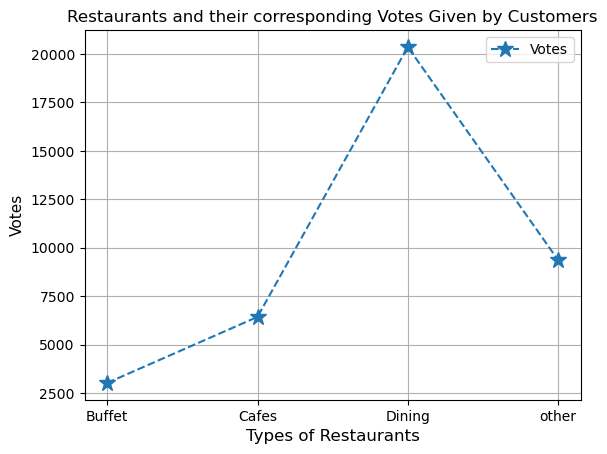

In [22]:
plt.plot(result,label="Votes" , linestyle="--" , marker = "*",markersize=12)
plt.legend()
plt.xlabel("Types of Restaurants",size=12)
plt.ylabel("Votes",size=11)
plt.title("Restaurants and their corresponding Votes Given by Customers")
plt.grid(visible = True)

# Rate Distribution

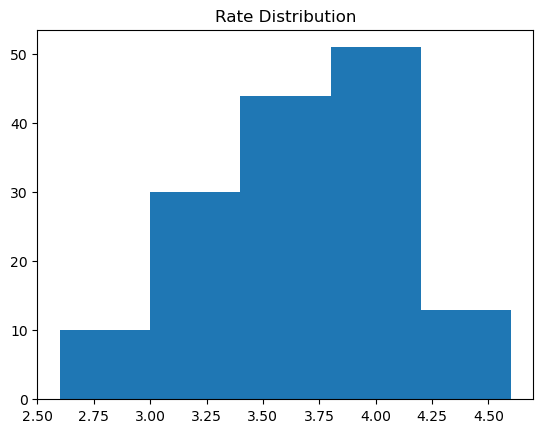

In [23]:
plt.hist(zomatodata["rate"],bins=5)
plt.title("Rate Distribution")
plt.show()

# what price range do most people usually place their orders on the zomato 

In [24]:
cost_group = zomatodata.groupby('approx_cost(for two people)')

In [25]:
# Finding cost range spend on zomato by couples on their each order : 
for cost , cost_count in cost_group:
    print(cost)

100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [26]:
# What is the most common amount spent by couples on their order on zomato?
cost_group['approx_cost(for two people)'].count()

approx_cost(for two people)
100     6
150    16
200    16
250     6
300    23
350     3
400    15
450     6
500    14
550     3
600    13
650     2
700     5
750     3
800    12
850     2
900     2
950     1
Name: approx_cost(for two people), dtype: int64

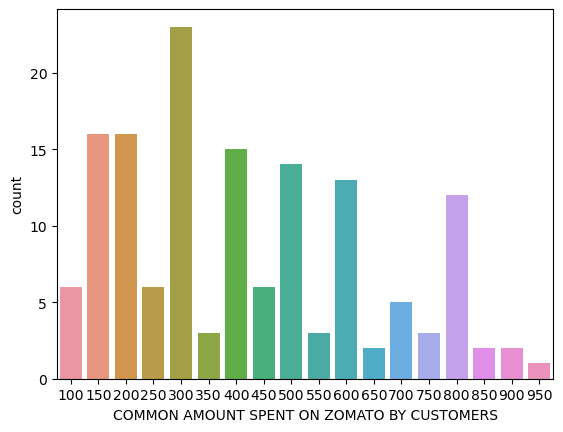

In [27]:
seaborn.countplot(x=zomatodata['approx_cost(for two people)'])
plt.xlabel("COMMON AMOUNT SPENT ON ZOMATO BY CUSTOMERS")
plt.show()

# Which mode of service do customers prefer more: online or offline?

In [28]:
prefer_group = zomatodata.groupby("online_order")

In [29]:
for onlinemode , details in prefer_group:
    print(onlinemode)

No
Yes


In [30]:
prefer_group["online_order"].count()

online_order
No     90
Yes    58
Name: online_order, dtype: int64

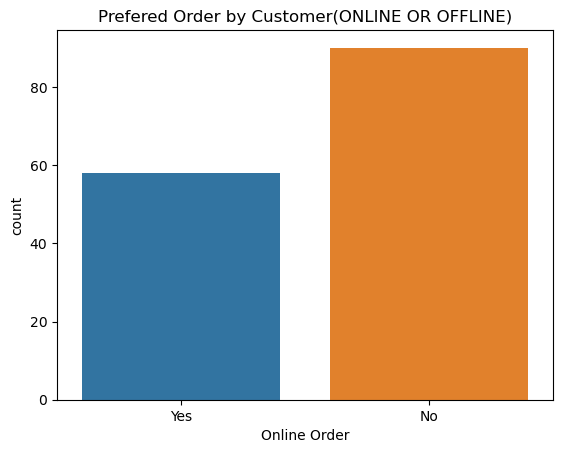

In [31]:
seaborn.countplot(x=zomatodata['online_order'])
plt.title("Prefered Order by Customer(ONLINE OR OFFLINE)")
plt.xlabel("Online Order")
plt.show()